In [1]:
import pandas as pd
import sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Load the data
nepse_data_path = "NEPSE.csv"  # Update the path if necessary
nepse = pd.read_csv(nepse_data_path)


In [3]:
# Data preprocessing
nepse["Date"] = pd.to_datetime(nepse["Date"])
nepse.set_index("Date", inplace=True)
nepse['Volume'] = nepse['Volume'].str.replace(',', '').astype(float)
nepse["Tomorrow"] = nepse["Close"].shift(-1)
nepse["Target"] = (nepse["Tomorrow"] > nepse["Close"]).astype(int)
nepse.drop(columns=['Symbol', 'Percent Change', 'Tomorrow'], inplace=True)
nepse.fillna(method='ffill', inplace=True)

C:\Users\himal\AppData\Local\Temp\ipykernel_18412\2055649199.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nepse.fillna(method='ffill', inplace=True)


In [4]:
X = nepse.drop(columns=['Target'])
y = nepse['Target']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)


In [7]:
# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5495 - val_loss: 0.7370 - val_accuracy: 0.4505
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5893 - val_loss: 0.7227 - val_accuracy: 0.4560
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5783 - val_loss: 0.7003 - val_accuracy: 0.4780
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.5907 - val_loss: 0.6902 - val_accuracy: 0.5275
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6113 - val_loss: 0.6727 - val_accuracy: 0.6209
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.6195 - val_loss: 0.6671 - val_accuracy: 0.6538
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.6346 - val_loss: 0.6517 - val_accuracy: 0.5989
Epoch 8/100
2

In [10]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc*100:.2f}%")

8/8 [==============================] - 0s 952us/step - loss: 0.4870 - accuracy: 0.7018
Test Accuracy: 70.18%


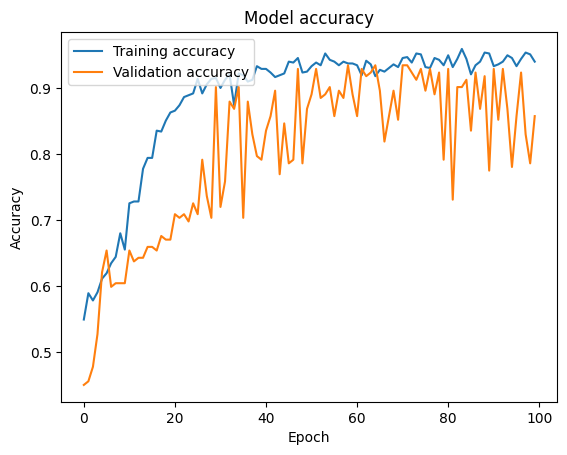

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

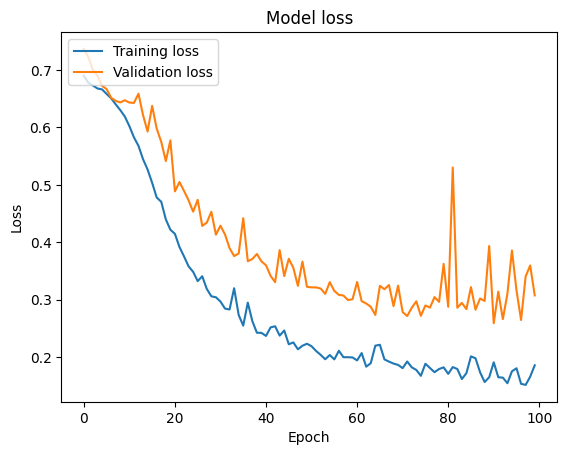

In [12]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Here's a version that includes L2 regularization and dropout, which are common techniques to reduce overfitting

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Define the model architecture with L2 regularization and Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with a slightly lower learning rate
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping and a validation split
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc*100:.2f}%")


Epoch 1/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7812 - accuracy: 0.5069 - val_loss: 0.7725 - val_accuracy: 0.4341
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7514 - accuracy: 0.5755 - val_loss: 0.7731 - val_accuracy: 0.4341
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7523 - accuracy: 0.5398 - val_loss: 0.7687 - val_accuracy: 0.4396
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7467 - accuracy: 0.5673 - val_loss: 0.7611 - val_accuracy: 0.4560
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7513 - accuracy: 0.5522 - val_loss: 0.7532 - val_accuracy: 0.4505
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7330 - accuracy: 0.5879 - val_loss: 0.7500 - val_accuracy: 0.4560
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7414 - accuracy: 0.5481 - val_loss: 0.7460 - val_accuracy: 0.4560
Epoch 8/100
2

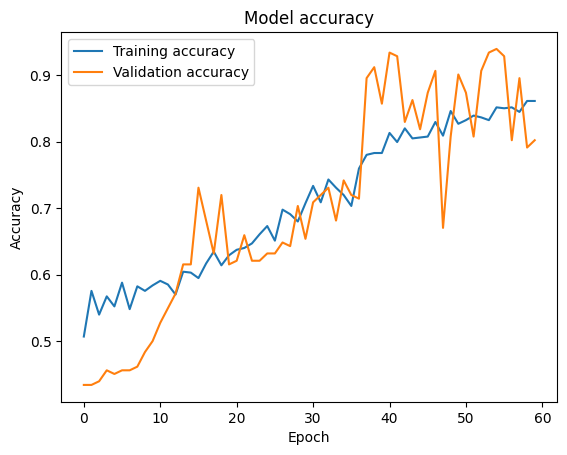

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

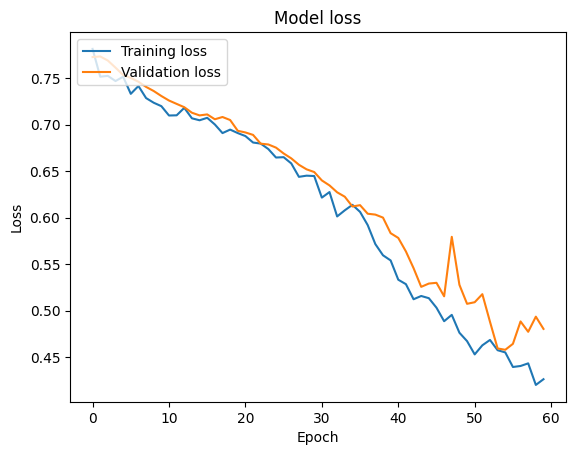

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

And here's a version that includes an LSTM layer, which is useful for sequential data like time series. Remember that to use LSTM layers, your input data needs to be reshaped into a 3D array [samples, timesteps, features].

In [16]:
import numpy as np


def create_sequences(data, sequence_length):
    sequences = []
    data_size = len(data)
    for i in range(data_size - sequence_length):
        sequence = data[i: i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)


sequence_length = 10  # Number of days in the sequence

# Reshape X_train and X_test
X_train_seq = create_sequences(X_train, sequence_length)
X_test_seq = create_sequences(X_test, sequence_length)

# Adjust y_train and y_test
y_train_seq = y_train[sequence_length:]
y_test_seq = y_test[sequence_length:]


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture with LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[1])),
    Dropout(0.5),
    LSTM(50),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with the sequence data
history = model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2, verbose=1,
                    callbacks=[early_stopping])

# Evaluate the model on the test set with the sequence data
test_loss, test_acc = model.evaluate(X_test_seq, y_test_seq, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/100
23/23 [==============================] - 2s 20ms/step - loss: 0.6833 - accuracy: 0.5597 - val_loss: 0.6907 - val_accuracy: 0.4833
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6760 - accuracy: 0.5806 - val_loss: 0.6866 - val_accuracy: 0.4889
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6744 - accuracy: 0.5917 - val_loss: 0.6879 - val_accuracy: 0.4889
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6745 - accuracy: 0.5917 - val_loss: 0.6780 - val_accuracy: 0.5722
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6675 - accuracy: 0.6056 - val_loss: 0.6739 - val_accuracy: 0.5889
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6686 - accuracy: 0.6000 - val_loss: 0.6699 - val_accuracy: 0.5889
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6708 - accuracy: 0.5944 - val_loss: 0.6692 - val_accuracy: 0.6056
Epoch 8/100


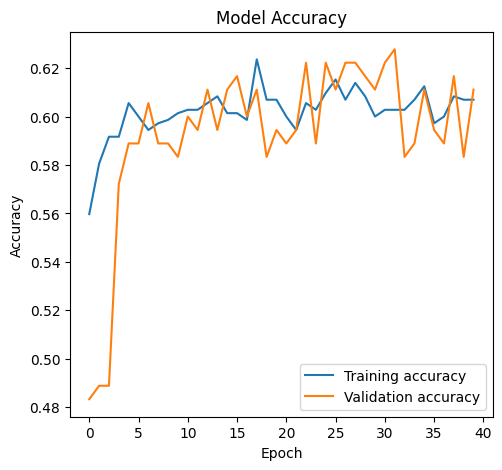

In [18]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

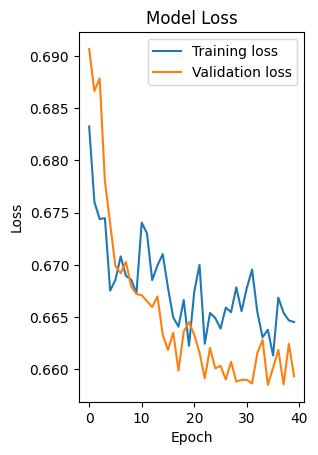

In [19]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

7/7 [==============================] - 0s 3ms/step


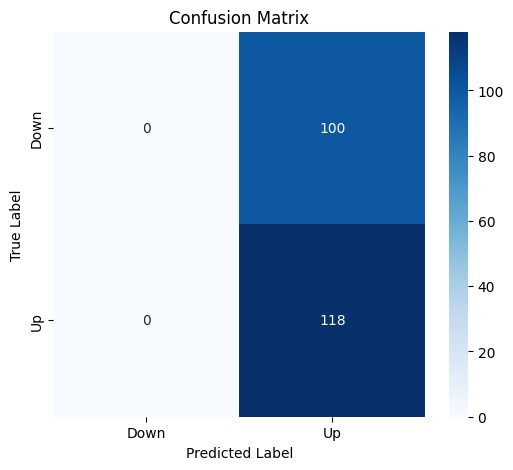

True Positives (Correctly predicted up movements): 118


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Make predictions on the test set
predictions = model.predict(X_test_seq)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test_seq, predictions)

# Calculate True Positives
true_positives = cm[1, 1]

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f"True Positives (Correctly predicted up movements): {true_positives}")